##**Análise exploratória dos dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/IgorNascAlves/data_flight_delays/blob/main/data/flights6.csv?raw=True')

In [3]:
df = df.sample(n=10000, random_state=42)

In [4]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,30,SN,Boeing 787,schengen,NTY,9.666239,11.666239,134,2017,False,-2.342120
9354,16,SN,Boeing 777,schengen,GMM,9.116774,11.116774,258,2011,False,7.396089
64321,7,BV,Boeing 737,schengen,ZIU,17.195358,20.195358,273,2021,False,85.907324
24993,8,SN,Airbus A320,schengen,MRD,8.713161,11.713161,206,2014,False,13.349641
10688,29,SN,Airbus A320,non-schengen,GXM,19.127187,21.127187,347,2011,False,20.189252


In [5]:
df.shape

(10000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 40337 to 44260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       10000 non-null  int64  
 1   airline         10000 non-null  object 
 2   aircraft_type   10000 non-null  object 
 3   schengen        10000 non-null  object 
 4   origin          10000 non-null  object 
 5   arrival_time    10000 non-null  float64
 6   departure_time  10000 non-null  float64
 7   day             10000 non-null  int64  
 8   year            10000 non-null  int64  
 9   is_holiday      10000 non-null  bool   
 10  delay           10000 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 869.1+ KB


In [7]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin                9
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             10000
dtype: int64

In [8]:
df['schengen'].unique()

array(['schengen', 'non-schengen'], dtype=object)

In [9]:
df['is_holiday'].unique()

array([False,  True])

##**Pré-processamento dos dados**

In [10]:
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,30,SN,Boeing 787,schengen,NTY,9.666239,11.666239,134,2017,False,-2.342120
9354,16,SN,Boeing 777,schengen,GMM,9.116774,11.116774,258,2011,False,7.396089
64321,7,BV,Boeing 737,schengen,ZIU,17.195358,20.195358,273,2021,False,85.907324
24993,8,SN,Airbus A320,schengen,MRD,8.713161,11.713161,206,2014,False,13.349641
10688,29,SN,Airbus A320,non-schengen,GXM,19.127187,21.127187,347,2011,False,20.189252
...,...,...,...,...,...,...,...,...,...,...,...
40080,5,SN,Airbus A320,schengen,GMM,10.408233,14.408233,117,2017,False,-8.301631
40123,26,SN,Airbus A320,schengen,FES,9.367723,11.367723,119,2017,False,40.807777
45488,16,SN,Boeing 777,schengen,GMM,9.116774,11.116774,112,2018,False,20.698418
30240,6,BV,Boeing 737,schengen,MRD,15.221966,18.221966,191,2015,False,79.942218


In [ ]:
#calculate the delay
#df['delay'] = (df['actual_arrival_time'] - df['arrival_time']) * 60

In [11]:
#arrival_time to period of day
df['arrival_time_period'] = df['arrival_time'].apply(lambda x: 'morning' if x >= 6 and x < 12 else ('afternoon' if x >= 12 and x < 18 else 'night'))

In [12]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,arrival_time_period
40337,30,SN,Boeing 787,schengen,NTY,9.666239,11.666239,134,2017,False,-2.342120,morning
9354,16,SN,Boeing 777,schengen,GMM,9.116774,11.116774,258,2011,False,7.396089,morning
64321,7,BV,Boeing 737,schengen,ZIU,17.195358,20.195358,273,2021,False,85.907324,afternoon
24993,8,SN,Airbus A320,schengen,MRD,8.713161,11.713161,206,2014,False,13.349641,morning
10688,29,SN,Airbus A320,non-schengen,GXM,19.127187,21.127187,347,2011,False,20.189252,night


In [13]:
# Transformando valores das colunas schengen e is_holiday
df['is_holiday'] = df['is_holiday'].map({False: 0, True: 1})
df['schengen'] = df['schengen'].map({'non-schengen': 0, 'schengen': 1})

In [14]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,arrival_time_period
40337,30,SN,Boeing 787,1,NTY,9.666239,11.666239,134,2017,0,-2.342120,morning
9354,16,SN,Boeing 777,1,GMM,9.116774,11.116774,258,2011,0,7.396089,morning
64321,7,BV,Boeing 737,1,ZIU,17.195358,20.195358,273,2021,0,85.907324,afternoon
24993,8,SN,Airbus A320,1,MRD,8.713161,11.713161,206,2014,0,13.349641,morning
10688,29,SN,Airbus A320,0,GXM,19.127187,21.127187,347,2011,0,20.189252,night


In [15]:
# Lista de variáveis categóricas
categorical_vars = ['airline', 'aircraft_type', 'origin', 'arrival_time_period']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

In [16]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_BV,airline_SN,...,origin_GXM,origin_MRD,origin_NTY,origin_UQG,origin_XVN,origin_YGM,origin_ZIU,arrival_time_period_afternoon,arrival_time_period_morning,arrival_time_period_night
40337,30,1,9.666239,11.666239,134,2017,0,-2.342120,0,1,...,0,0,1,0,0,0,0,0,1,0
9354,16,1,9.116774,11.116774,258,2011,0,7.396089,0,1,...,0,0,0,0,0,0,0,0,1,0
64321,7,1,17.195358,20.195358,273,2021,0,85.907324,1,0,...,0,0,0,0,0,0,1,1,0,0
24993,8,1,8.713161,11.713161,206,2014,0,13.349641,0,1,...,0,1,0,0,0,0,0,0,1,0
10688,29,0,19.127187,21.127187,347,2011,0,20.189252,0,1,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.980692
departure_time,0.980692,1.000000


##**Modelo RandomForestRegressor**

In [17]:
# Dividindo o conjunto de dados em treinamento e teste
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [18]:
X.head()

,schengen,arrival_time,is_holiday,airline_BV,airline_SN,airline_ZV,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,...,origin_GXM,origin_MRD,origin_NTY,origin_UQG,origin_XVN,origin_YGM,origin_ZIU,arrival_time_period_afternoon,arrival_time_period_morning,arrival_time_period_night
40337,1,9.666239,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9354,1,9.116774,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
64321,1,17.195358,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
24993,1,8.713161,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10688,0,19.127187,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [19]:
y.head()

40337    -2.342120
9354      7.396089
64321    85.907324
24993    13.349641
10688    20.189252
Name: delay, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 193.34601432463987
Root Mean Squared Error: 13.904891740845732
Mean Absolute Error: 10.945812769968503
R-squared: 0.6093360076847334


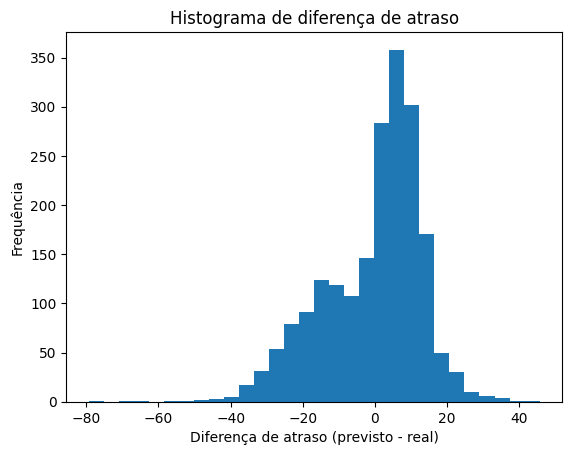

In [22]:
# Calcular a diferença entre atrasos previstos e reais
delay_diff = y_pred - y_test

# Plotar histograma de diferença de atraso
plt.hist(delay_diff, bins=30)
plt.xlabel("Diferença de atraso (previsto - real)")
plt.ylabel("Frequência")
plt.title("Histograma de diferença de atraso")
plt.show()

###**Criando uma nova feature: is_weekend**

In [23]:
#Criando uma nova feature: is_weekend
df_encoded['is_weekend'] = df_encoded['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

In [24]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_BV,airline_SN,...,origin_MRD,origin_NTY,origin_UQG,origin_XVN,origin_YGM,origin_ZIU,arrival_time_period_afternoon,arrival_time_period_morning,arrival_time_period_night,is_weekend
40337,30,1,9.666239,11.666239,134,2017,0,-2.342120,0,1,...,0,1,0,0,0,0,0,1,0,False
9354,16,1,9.116774,11.116774,258,2011,0,7.396089,0,1,...,0,0,0,0,0,0,0,1,0,True
64321,7,1,17.195358,20.195358,273,2021,0,85.907324,1,0,...,0,0,0,0,0,1,1,0,0,True
24993,8,1,8.713161,11.713161,206,2014,0,13.349641,0,1,...,1,0,0,0,0,0,0,1,0,False
10688,29,0,19.127187,21.127187,347,2011,0,20.189252,0,1,...,0,0,0,0,0,0,0,0,1,False


In [25]:
# Transformando valores 'False' e 'True' em 0 e 1
df_encoded['is_weekend'] = df_encoded['is_weekend'].map({False: 0, True: 1})

In [26]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_BV,airline_SN,...,origin_MRD,origin_NTY,origin_UQG,origin_XVN,origin_YGM,origin_ZIU,arrival_time_period_afternoon,arrival_time_period_morning,arrival_time_period_night,is_weekend
40337,30,1,9.666239,11.666239,134,2017,0,-2.342120,0,1,...,0,1,0,0,0,0,0,1,0,0
9354,16,1,9.116774,11.116774,258,2011,0,7.396089,0,1,...,0,0,0,0,0,0,0,1,0,1
64321,7,1,17.195358,20.195358,273,2021,0,85.907324,1,0,...,0,0,0,0,0,1,1,0,0,1
24993,8,1,8.713161,11.713161,206,2014,0,13.349641,0,1,...,1,0,0,0,0,0,0,1,0,0
10688,29,0,19.127187,21.127187,347,2011,0,20.189252,0,1,...,0,0,0,0,0,0,0,0,1,0


In [40]:
# Dividindo o conjunto de dados em treinamento e teste
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 75.18987503746563
Root Mean Squared Error: 8.671209548699975
Mean Absolute Error: 6.264957057254507
R-squared: 0.8480756023524664


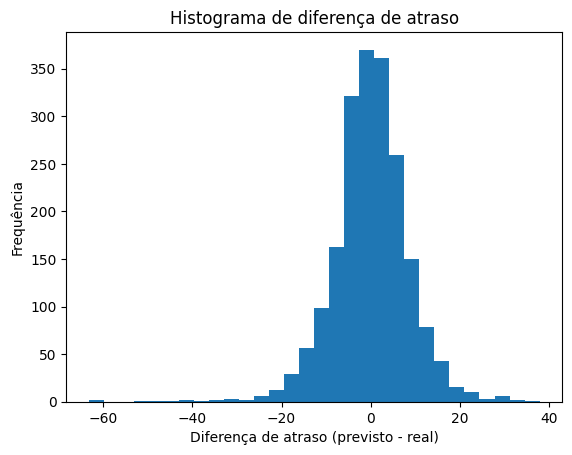

In [30]:
# Calcular a diferença entre atrasos previstos e reais
delay_diff = y_pred - y_test

# Plotar histograma de diferença de atraso
plt.hist(delay_diff, bins=30)
plt.xlabel("Diferença de atraso (previsto - real)")
plt.ylabel("Frequência")
plt.title("Histograma de diferença de atraso")
plt.show()

###**Validação-cruzada**

In [31]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Definindo as métricas de avaliação
scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': make_scorer(r2_score)
}

# Realizando a validação cruzada e calculando as métricas
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Extraindo as métricas de avaliação
mse_scores = cv_results['test_mse']
rmse_scores = cv_results['test_rmse']
mae_scores = cv_results['test_mae']
r2_scores = cv_results['test_r2']

# Calculando o desvio-padrão das métricas
mse_std = np.std(mse_scores)
rmse_std = np.std(rmse_scores)
mae_std = np.std(mae_scores)
r2_std = np.std(r2_scores)

# Imprimindo as métricas de avaliação e desvio-padrão
print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"MAE Scores: {mae_scores}")
print(f"R2 Scores: {r2_scores}")
print('----------------------------------------------------------------')
print(f"MSE Mean: {mse_scores.mean()}, MSE Std: {mse_std}")
print(f"RMSE Mean: {rmse_scores.mean()}, RMSE Std: {rmse_std}")
print(f"MAE Mean: {mae_scores.mean()}, MAE Std: {mae_std}")
print(f"R2 Mean: {r2_scores.mean()}, R2 Std: {r2_std}")

MSE Scores: [74.78395409 69.48868544 72.66989157 65.62207553 66.53495026]
RMSE Scores: [8.64777163 8.33598737 8.52466372 8.10074537 8.15689587]
MAE Scores: [6.16000819 6.06867335 6.13425918 5.93499555 6.06017419]
R2 Scores: [0.85329161 0.85106861 0.85288918 0.85500955 0.8588104 ]
----------------------------------------------------------------
MSE Mean: 69.8199113766464, MSE Std: 3.5010459302093224
RMSE Mean: 8.353212791585609, RMSE Std: 0.20915887534832503
MAE Mean: 6.071622094140564, MAE Std: 0.07815634161810384
R2 Mean: 0.8542138690474136, R2 Std: 0.0026176035368233094


###**Feature importance**

In [32]:
# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para visualizar as importâncias das features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Exibindo as importâncias das features
feature_importance_df

,Feature,Importance
3,airline_BV,0.311134
24,is_weekend,0.239348
2,is_holiday,0.122950
13,origin_GMM,0.096426
19,origin_YGM,0.066490
11,aircraft_type_Embraer E175,0.040443
10,aircraft_type_Boeing 787,0.039851
7,aircraft_type_Airbus A330,0.014981
1,arrival_time,0.011633
6,aircraft_type_Airbus A320,0.007878


###**Hiperparâmetros**

In [43]:
# Imprimir os parâmetros do modelo
params = model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [44]:
from sklearn.model_selection import GridSearchCV

def grid_search_cv(parametros, modelo, X_train, y_train):

  #Determinando o modelo e quais parâmetros serão adicionados
  modelo_grid = GridSearchCV(modelo, param_grid=parametros, cv=5, scoring='neg_mean_absolute_error')

  #Treino
  modelo_grid.fit(X_train, y_train)

  #Obtenção dos melhores valores para cada parâmetro
  best_params = modelo_grid.best_params_

  return best_params

In [45]:
# Definindo os hiperparâmetros a serem otimizados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,3]
}

modelo_rf = RandomForestRegressor(random_state=42)

In [46]:
grid_search_cv(param_grid, modelo_rf, X_train, y_train)

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [49]:
# Treinando o modelo
model = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 76.00639077877548
Root Mean Squared Error: 8.718164415676931
Mean Absolute Error: 6.292269166484153
R-squared: 0.8464257969483954


**Antes da otimização:**

- Mean Squared Error: 75.18987503746563
- Root Mean Squared Error: 8.671209548699975
- Mean Absolute Error: 6.264957057254507
- R-squared: 0.8480756023524664

###**Gradient Boosting Regressor**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
# Treinando o modelo
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

# Fazendo previsões
y_pred = model_boosting.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 74.3911678389083
Root Mean Squared Error: 8.625031468864812
Mean Absolute Error: 6.2349247609876555
R-squared: 0.849689424824935


In [52]:
# Definir os hiperparâmetros para testar
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}
modelo_boosting = GradientBoostingRegressor(random_state=42)

In [53]:
grid_search_cv(parameters, modelo_boosting, X_train, y_train)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

In [54]:
# Treinando o modelo
model_boosting = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200)
model_boosting.fit(X_train, y_train)

# Fazendo previsões
y_pred = model_boosting.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 74.55654941090624
Root Mean Squared Error: 8.634613448841021
Mean Absolute Error: 6.2413010646916325
R-squared: 0.8493552641989828
